# Welcome to our group project: Measuring Air Quality

Our group is composed by Ben Sabath, Sergio Scattone, Mandy Venables.

In a world dealing with increasing wildfires, growing pollution, and other environmental concerns, the air we breathe can be negatively affected. At the same time, consumers are becoming more health conscious. This creates a market for wearable air quality monitors and air purifiers, which has not yet fully been explored.

Our project aims to create an air quality sensor that could be used as a wearable and inform the user if the air quality around them is poor, prompting them to take action by turning on an air purifier or wearing a mask.
We will use an Arduino dust sensor to build out a physical device, and display the output on a dashboard.
On the dashboard we will also pull in air quality measures from other sources, like the Environmental Protection Agency (EPA).

# Air Quality Dashboard

Please set the variables in the way is prefered to you:

data_set is for select the set of measures you want to use

verbose is the amount of comments you want to see.

The observations / conclusions from the data and graphics are shown onlt in the "very verbose" configuration.

PURIFIER_FACTOR is the amount of air purified in each measurement you want to consider for the simulation. You can have an idea of what are good reasonable values by looking at the Particulate Measure graph / analysis

RND_VARIATION = 0.3 # @param number

In [46]:
data_set = 'Second' # @param ["First", "Second"]
verbose = 'very verbose' # @param ["none", "verbose", "very verbose"]
PURIFIER_FACTOR = 400 # @param number
RND_VARIATION = 0.3 # @param number

## Imports required

First we have to import all the libraries and resources that we will need across the file.

Notice that we have to install gTTS which is not included by default on the colab environment.

In [47]:
## Imports
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio
import math
import urllib.request
import random
import requests
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
if verbose == 'very verbose':
  print("### Imports ready ###")

### Imports ready ###


## Setting up the data

Now we will download a set of measured data from Arduino sensors.

Colab removes all the files from its environment each time a session is disconected, that's why we have to re-download the file each time.

There are two set of measures, you can choose whichever you prefer.
By default it's selected the set2 because it has more data.

Remember you have to run this before all the further sections, because it sets the data that is used in each one of them.

In [48]:
## Read input data from Andruino
if data_set == 'First':
  file_url = 'https://drive.google.com/uc?export=download&id=1cgMSwwPIxhbfYRXOR6lYpKT0AQn38nG4'
else:
  file_url = 'https://drive.google.com/uc?export=download&id=1tZm99VmfUpSQi9QpEktL3xjeubDZRMX2'

file_name = 'data.csv'
input_file = urllib.request.urlretrieve(file_url, 'data.csv')
sensors_data = np.genfromtxt(file_name, delimiter=',')

# timestamp data
tstp_data = sensors_data[:, 0]

# temperature data
temp_data = sensors_data[:, 1]
temp_mean = round(np.mean(temp_data), 2)
temp_std = round(np.std(temp_data), 2)

# humidity data
hum_data = sensors_data[:, 2]
hum_mean = round(np.mean(hum_data), 2)
hum_std = round(np.std(hum_data), 2)
hum_data_rounded = np.around(hum_data)

# particulate matter data
pm_data = sensors_data[:, 3]
pm_mean = round(np.mean(pm_data), 2)
pm_std = round(np.std(pm_data), 2)
avg_end = len(pm_data) - (len(pm_data) % 4)
pm_data_avg = np.average(pm_data[0:avg_end].reshape(-1, 4), axis=1)
pm_data_avg_std = round(np.std(pm_data_avg),2)
pm_data_avg_mean = round(np.mean(pm_data_avg),2)

# simulation: particulate matter
pm_data_pr = np.zeros_like(pm_data)
PURIFIER_FACTOR = 400
RND_VARIATION = 0.3
purified_air = 0
purified_air_low = 0
purified_air_high = 0
for i in range(pm_data.shape[0]):
  prfd_ft = PURIFIER_FACTOR * RND_VARIATION
  rnd_air_pur = random.uniform(PURIFIER_FACTOR - prfd_ft, PURIFIER_FACTOR + prfd_ft)
  purified_air = purified_air + rnd_air_pur
  result = pm_data[i] - purified_air
  if result > 0:
    pm_data_pr[i] = result
  else:
    pm_data_pr[i] = 0
    purified_air = 0

pm_data_pr_mean = round(np.mean(pm_data_pr),2)
pm_data_pr_std = round(np.std(pm_data_pr),2)

if verbose == 'very verbose':
  # Presentation
  print("Input data")
  print("We have taken input data from the sensors in Andruino during a day.")
  print("The measures are taken in between 30 second lapses, currently we have a set of " + str(len(sensors_data)) + " measures.")
  print("To test the expected results we have used gas near the sensors to provoke changes in the measures.")
  print("Now we will start looking at each one of the sensors' set of data.")
  print()

Input data
We have taken input data from the sensors in Andruino during a day.
The measures are taken in between 30 second lapses, currently we have a set of 465 measures.
To test the expected results we have used gas near the sensors to provoke changes in the measures.
Now we will start looking at each one of the sensors' set of data.



## Temperature Analysis

Here we show the raw data, the mean, the standard deviation and we make some observations about it.

Temperature: (taken in celsius grades)
The dust sensor does not work well when the celsius degrees are above 45.

Raw data:
[26.4  26.36 26.34 26.36 26.34 26.38 26.39 26.4  26.4  26.38 26.37 26.35
 26.35 26.32 26.32 26.28 26.26 26.24 26.2  26.18 26.16 26.11 26.11 26.07
 26.07 26.07 26.08 26.09 26.09 26.08 26.1  26.1  26.12 26.14 26.15 26.17
 26.18 26.17 26.18 26.2  26.19 26.2  26.19 26.2  26.21 26.22 26.25 26.25
 26.25 26.24 26.25 26.24 26.22 26.21 26.19 26.19 26.16 26.17 26.13 26.15
 26.14 26.17 26.16 26.17 26.16 26.17 26.16 26.15 26.16 26.17 26.17 26.15
 26.16 26.15 26.13 26.14 26.11 26.11 26.1  26.09 26.09 26.07 26.07 26.07
 26.09 26.09 26.11 26.13 26.12 26.14 26.11 26.12 26.1  26.07 26.05 26.05
 26.04 26.05 26.05 26.05 26.05 26.06 26.02 26.04 26.05 26.07 26.08 26.11
 26.1  26.13 26.14 26.16 26.17 26.17 26.18 26.19 26.19 26.21 26.2  26.23
 26.21 26.22 26.22 26.22 26.22 26.22 26.19 26.18 26.16 26.14 26.13 26.12
 26.11 26.09 26.1  26.07 26.07 26.04 26.06 26.05 26.04 26.06 26.06 26.09


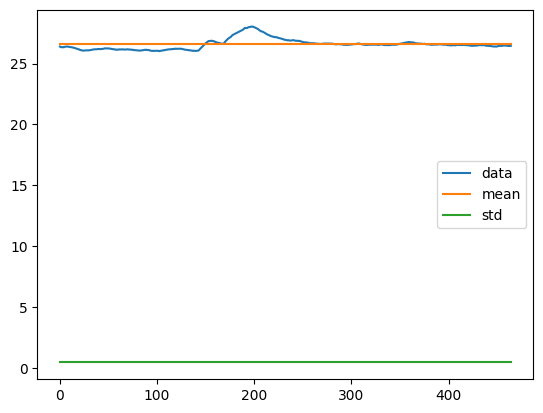

In [49]:
## Temperature Analysis
print("Temperature: (taken in celsius grades)")
print("The dust sensor does not work well when the celsius degrees are above 45.")
print()

if verbose == 'very verbose':
  print("Raw data:")
  print(temp_data)
  print()

if verbose == 'verbose':
  print("Mean: " + str(temp_mean))
  print()

  print("Standard Deviation: " + str(temp_std))
  print()

  print("Observations:")
  print("from what we can see in the data, the temperature didn't change much.")
  print("This is expectable considering that the sensor is located inside a house, the temperature should be relarively stable.")
  print()

print("Visualization:")
df = pd.DataFrame({
      'data': temp_data,
      'mean': [temp_mean for i in range(len(temp_data))],
      'std': [temp_std for i in range(len(temp_data))]})

df.plot()
plt.show()

## Relative Humidity
Here we show the raw data, the mean, the standard deviation and we make some observations about it.

Relative Humidity:
The dust sensor does not work well when the humidity is above 95%.
Here we should trigger an alarm if that situation happens to let the user know that the particules messure is not working.

Raw data:
[65.7  65.64 65.58 65.68 66.08 65.82 65.82 66.28 66.02 66.07 66.22 66.27
 66.14 66.06 65.84 65.61 65.66 65.52 65.42 65.22 65.03 64.89 64.91 64.95
 65.08 65.12 65.25 65.36 65.45 65.46 65.45 65.49 65.46 65.42 65.4  65.41
 65.36 65.28 65.3  65.28 65.27 65.27 65.24 65.28 65.22 65.16 65.19 65.15
 65.21 65.29 65.31 65.27 65.14 65.01 64.93 64.81 64.73 64.62 64.43 64.57
 64.41 64.21 64.03 63.75 63.7  63.82 63.97 64.04 64.22 64.32 64.37 64.33
 64.21 64.12 64.02 63.92 63.87 63.77 63.67 63.57 63.47 63.41 63.47 63.53
 63.69 63.77 63.9  64.02 64.07 63.96 63.9  63.77 63.7  63.58 63.53 63.47
 63.33 63.27 63.23 63.09 63.09 63.23 63.42 63.52 63.64 63.74 63.82 63.82
 63.85 63.85 63.81 63.8  63.78 63.8  63.79 63.78 63.78 63.81 63.79 63.82
 63.84 63.89 63.9  63.93 63.88 63.78 63.7  63.58 6

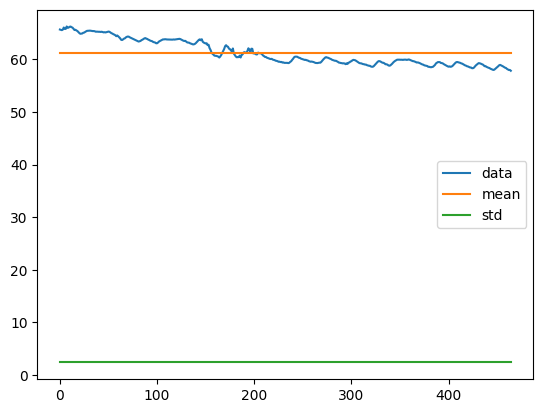


Histogram of values


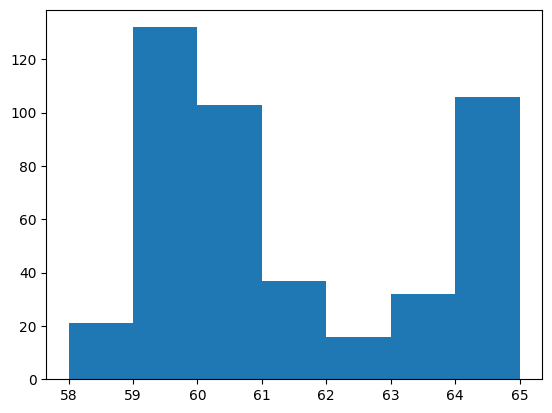

In [50]:
## Relative Humidity Analysis
print("Relative Humidity:")
print("The dust sensor does not work well when the humidity is above 95%.")
print("Here we should trigger an alarm if that situation happens to let the user know that the particules messure is not working.")
print()

if verbose == 'very verbose':
  print("Raw data:")
  print(hum_data)
  print()

if verbose == 'verbose':
  print("Mean: " + str(hum_mean))
  print()

  print("Standard Deviation: " + str(hum_std))
  print()

  print("Observations:")
  print("The relative humedity vary during the day because of many reasons.")
  print("For example, open a windows, turn on heaters or Air Conditioners.")
  print("In our data we see that the RH didn't change much during the measures, but we have to be alert from humidiy not rising 95%, "+
        "above that PM measures will be inconsistence and it is a risk for the user.")
  print()

print("Visualization:")
df = pd.DataFrame({
      'data': hum_data,
      'mean': [hum_mean for i in range(len(hum_data))],
      'std': [hum_std for i in range(len(hum_data))]})

df.plot()
plt.show()
print()

print("Histogram of values")
plt.hist(hum_data_rounded, bins=range(int(min(hum_data_rounded)), int(max(hum_data_rounded))))
plt.show()

## Particulate Matter Analysis
Here we show the raw data, the mean, the standard deviation and we make some observations about it.

Particulate Matter (PM):
We will be focusing on measuring levels of particulate matter (PM) in the immediate area of the device using an Arduino dust sensor.

Raw data:
[   0.62 1112.58  179.65 1617.86    0.62    0.62    0.62    0.62  168.57
    0.62  715.29    0.62   45.64  429.14  521.57   59.77    0.62  782.3
  816.89  163.48    0.62   59.14    0.62    0.62   33.36    0.62  338.43
    0.62  151.83    0.62    0.62   39.18    0.62    0.62   81.29   56.75
   23.81  173.25    0.62    0.62    0.62  147.92    0.62    0.62    0.62
    0.62    7.25  195.11  105.94    0.62   59.12  183.18  135.06    0.62
   94.23    0.62   46.21   59.16    0.62    1.4   354.73   29.97  724.49
  457.86   47.06  100.97    0.62   89.38  134.36    0.62    0.62    0.62
  225.13    0.62    8.27    0.62    0.62    2.76  106.33    0.62   69.66
  142.79    0.62  455.7     0.62  256.65   17.37    0.62  113.28   44.28
   54.19    0.62    0.62    0.62    0.62  143.06    0.62    0.62    0.62
    0.62    0.62   50.22    0

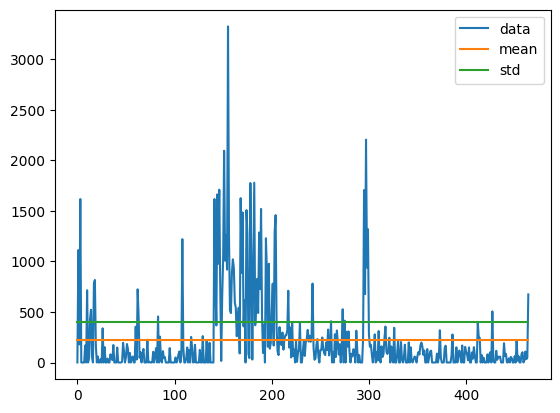

In [51]:
# Particulate Matter Raw Analysis
print("Particulate Matter (PM):")
print("We will be focusing on measuring levels of particulate matter (PM) in the immediate area of the device using an Arduino dust sensor.")
if verbose == 'verbose':
  print("The Arduino dust sensor collects counts of particles greater than 1 micron in size as air flows through the sensor.")
  print("From those particle counts, we will have to estimate the total mass of particles present, as mass is the official reported standard for particulate matter used by the EPA.")
  print("From those masses, we will be able to determine the Air Quality Index (AQI) measurement for particulate matter.")
  print("To calibrate our values, we will take outdoor samples and compare them to official  outdoor measurements reported by the EPA.")
  print("There are some concerns with this method, as particulate matter is heavily affected by local sources (roads, restaurants, etc).")
  print("But believe that these samples, along  with indoor tests looking at PM next to gas stoves, will provide a reasonable estimate for this proof of concept.")
print()

if verbose == 'very verbose':
  print("Raw data:")
  print(pm_data)
  print()

if verbose == 'verbose':
  print("Mean: " + str(pm_mean))
  print()

  print("Standard Deviation: " + str(pm_std))
  print()

  print("Observations:")
  print("We have to take into account that the raw data taken from the Andruino is not the data that we will use to evaluage the Particulate Matter in the air.")
  print("For that we have to first process the that through an algorithm that will retrieve us the AQI (Air Quality Index).")
  print("We can see that the lower element is "+str(min(pm_data))+", that value is repeated "+str(np.count_nonzero(pm_data == min(pm_data)))+" times.")
  print("This is showing us the sensor has a lower limit there, and that lower value is the measure for when the sensor does not detect anything.")
  print("We assume this because the lowest element is repeat many times with the exact same decimals.")
  print()

print("Visualization:")
df = pd.DataFrame({
      'data': pm_data,
      'mean': [pm_mean for i in range(len(pm_data))],
      'std': [np.std(pm_data) for i in range(len(pm_data))]})

df.plot()
plt.show()
print()

## Simulation: Particulate Matter Analysis
Here we perform a simulation of the air purifier working and cleaning the air.

Because of this, we are considering that each time we measure the air will be cleaner. We have set a cleaner factor and a deviation percentage configurable on the top of this colab file to set the desire values.

Particulate Matter Simulation:
Simulation of decreasing for activation of Air Purifier



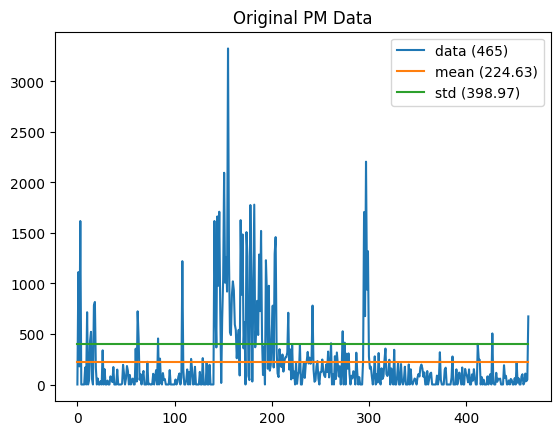

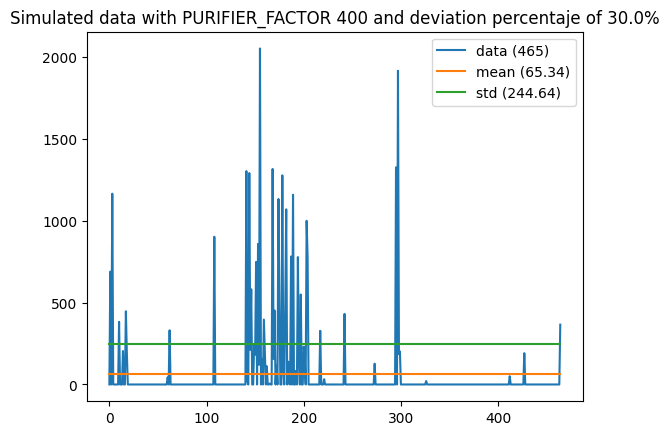


Observations:
We can see there is an considerable change from the graph with the air purified and the previous one.
On top of that we can see the pronunciations of the spikes.
The mean was reduced considerably (70.91%) but that was not the case for the standar deviation (38.68%).
This is telling us that even though we can decrease de PM levels in general terms, handle the spikes of PM is out of hand.
The evaluation give us very important information:
    1- If we notice an spike is unsure that we will be able to purify the air in time to avoide health risk for the users.
    2- This mesures are being taken in lapsus of thirty seconds. If we notice that after 30 sends the spike went down probably there is no danger
       and the user is safe. But if we notice the spike remains, increases or goes down but not significantly it means the user is in danger.
       But not only that, it means also that it is too late to take proper actions
    3- For that reason we have to trigger an alarm

In [52]:
# Particulate Matter Simulation Analysis
print("Particulate Matter Simulation:")
print("Simulation of decreasing for activation of Air Purifier")
if verbose == 'verbose':
  print("Here we are going to propose a simulation case where we turn on the Air Purifier and the PM measure will decrease.")
  print("Here we set a PURIFIER_FACTOR that is the factor by which the air is going to be purified in each measure.")
  print("In each measure the air will have less particulate matter given by the factor (+-30%) and the previous accumulation of cleaned air.")
  print("We will take the original data about particulate matter and we will take the amount relative to the air that was cleaned.")
print()

# Original mean and daviation for pm_data
df = pd.DataFrame({
      'data ('+str(len(pm_data))+')': pm_data,
      'mean ('+str(pm_mean)+')': [pm_mean for i in range(len(pm_data))],
      'std ('+str(pm_std)+')': [pm_std for i in range(len(pm_data))]})

df.plot(title="Original PM Data")
plt.show()
print()

# pm_data with air purified given PURIFIER_FACTOR
df = pd.DataFrame({
      'data ('+str(len(pm_data_pr))+')': pm_data_pr,
      'mean ('+str(pm_data_pr_mean)+')': [pm_data_pr_mean for i in range(len(pm_data_pr))],
      'std ('+str(pm_data_pr_std)+')': [pm_data_pr_std for i in range(len(pm_data_pr))]})

df.plot(title="Simulated data with PURIFIER_FACTOR " + str(PURIFIER_FACTOR) + " and deviation percentaje of " + str(RND_VARIATION*100) + "%")
plt.show()
print()

if verbose == 'very verbose':
  print("Observations:")
  print("We can see there is an considerable change from the graph with the air purified and the previous one.")
  print("On top of that we can see the pronunciations of the spikes.")
  print("The mean was reduced considerably ("+str(round(((np.mean(pm_data_pr)/np.mean(pm_data))-1)*-100,2))+"%) "
        "but that was not the case for the standar deviation ("+str(round(((np.std(pm_data_pr)/np.std(pm_data))-1)*-100,2))+"%).")
  print("This is telling us that even though we can decrease de PM levels in general terms, handle the spikes of PM is out of hand.")
  print("The evaluation give us very important information:")
  print("    1- If we notice an spike is unsure that we will be able to purify the air in time to avoide health risk for the users.")
  print("    2- This mesures are being taken in lapsus of thirty seconds. If we notice that after 30 sends the spike went down probably there is no danger")
  print("       and the user is safe. But if we notice the spike remains, increases or goes down but not significantly it means the user is in danger.")
  print("       But not only that, it means also that it is too late to take proper actions")
  print("    3- For that reason we have to trigger an alarm right away (maybe with sounds or lights) to alert the users about their safety.")
  print("       Maybe we could trigger another measure right away, like in miliseconds to verify the spike is decreasing fast enough to not be a risk.")
  print("For the purpuse of this simulation we have put the sensors next to the oven, so is natural to see the spikes in the measures, and this give us a good idea ")
  print("of a real danger case where the user health could be at risk.")
  print()

## Utility for the AQI converter functions

In [53]:
# util AQI functions
def particle_count_to_pm(particle_count: float) -> float:
    """From a particle count per 0.01 cubic feet, calculate
    the estimated mass of PM2.5 in ug/m^3.

    Args:
        particle_count (float): Particle count per 0.01 cubic feet of air

    Returns:
        float: ug/m^3 of PM
    """
    particle_count = particle_count/0.0002831685 ## ratio of 0.01 cubic feet to cubic meter
    # expected particle mass = volume of a spherical particle with 1.75um diameter * unit density
    particle_volume = math.pi/6 * math.pow(1.75,3) # volume in cubic micrometers
    particle_density = 1.0 # 1 gram/cubic centimeter, want micrograms/cubic micrometer
    particle_density = particle_density/1000000 # 1e6 micrograms/1e12 cubic micrometers/cubic cm
    particle_mass = particle_density * particle_volume
    return particle_count * particle_mass

def pm_aqi(pm_measure: float)-> int:
    """Return the AQI for the measured pm2.5
    Based on method published here: https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf

    Args:
        pm_measure (float): pm2.5 in micrograms/cubic meter. We reccommend taking a longer term  average
        here. This function only makes a point calculation

    Returns:
        float: AQI for measured PM
    """
    pm_measure = math.floor(pm_measure*10)/10 # truncate to 1 decimal place
    if pm_measure <= 12.0:
        return pm_aqi_breakpoint(pm_measure, 12.0, 0, 50, 0)
    elif pm_measure <= 35.4:
        return pm_aqi_breakpoint(pm_measure,35.4,12.1,100,51)
    elif pm_measure <= 55.4:
        return pm_aqi_breakpoint(pm_measure, 55.4,35.5,150,101)
    elif pm_measure <= 150.4:
        return pm_aqi_breakpoint(pm_measure, 150.4,55.5,200,151)
    elif pm_measure <= 250.4:
        return pm_aqi_breakpoint(pm_measure,250.4,150.5,300,201)
    elif pm_measure <= 500.4:
        return pm_aqi_breakpoint(pm_measure,500,5,250.5,500,301)
    else:
        return 501 # beyond the AQI

def pm_aqi_breakpoint(pm, bp_high, bp_low, index_high, index_low):
    index = ((index_high - index_low)/(bp_high - bp_low))*(pm - bp_low) + index_low
    if index - math.floor(index) > 0.5:
        return math.ceil(index)
    else:
        return math.floor(index)

def particle_count_to_aqi(particle_count: float) -> int:
    pm_measure = particle_count_to_pm(particle_count)
    aqi = pm_aqi(pm_measure)
    return aqi

## AQI Analysis

The EPA developed the AQI, which reports levels of ozone, particle pollution, and other common air pollutants on the same scale.

Here we are comparing the input data from the sensors with the result in AQI measurement.


AQI - Air Quality Index Analysis:
The EPA developed the AQI, which reports levels of ozone, particle pollution, and other common air pollutants on the same scale.
An AQI reading of 101 corresponds to a level above the national air quality standard - the higher the AQI rating, the greater the health impact.
To know more about the AQI you can go to: https://docs.airnowapi.org/aq101
Raw input data after average every four observations:
[ 727.6775    0.62    221.275   264.03    440.8225   15.25     93.2575
   48.0625   34.82     49.575    37.445    50.9      87.215    57.6325
   26.8475  391.7625   59.5075   34.055    58.66     27.5825  167.1925
   68.815    53.0925   36.23      0.62     18.7325   65.      342.75
   78.535   101.955    45.005    31.745    65.7825   54.965    49.295
  692.8675 1272.79    950.8    1628.74    786.855   772.27    330.6275
 1089.725   847.95    734.06    766.56    794.3775  698.4775  627.79
  365.76    690.6625  495.48    254.4775  224.8425  380.9525  158.46
  

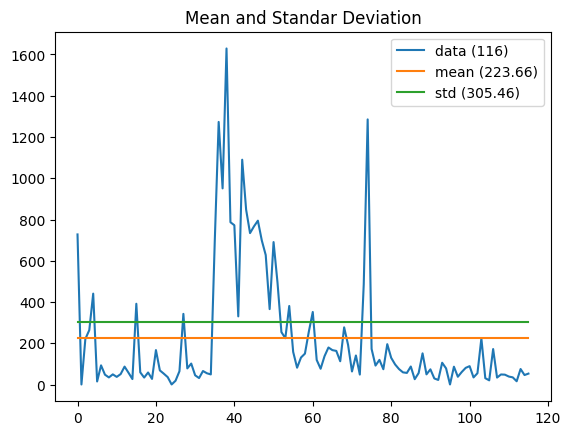


Raw AQI data:
[ 7.21118728  0.00614412  2.19280583  2.6165022   4.36849237  0.15112547
  0.92416943  0.47629299  0.34506157  0.49128166  0.37107497  0.50441223
  0.86428905  0.57113041  0.26605516  3.88231429  0.58971141  0.33748052
  0.5813128   0.27333891  1.65685545  0.6819475   0.52613962  0.35903448
  0.00614412  0.18563658  0.64414136  3.39660693  0.77827141  1.0103605
  0.44599357  0.31458873  0.65189583  0.54469584  0.4885069   6.86622481
 12.61317968  9.42230159 16.14059686  7.79762844  7.65309303  3.27647457
 10.79902987  8.40307177  7.27443701  7.59650769  7.87217541  6.92181916
  6.22131544  3.62463297  6.84437355  4.91014093  2.52183819  2.22815928
  3.77518863  1.57031753  0.81159334  1.30166104  1.4872233   2.54926375
  3.48693537  1.18415479  0.76112734  1.36570355  1.78253734  1.65586446
  1.61803354  1.12115281  2.74879892  1.91096921  0.62969773  1.39857954
  0.48184251  4.82206698 12.73450123  1.71252413  0.91383839  1.18784621
  0.73843374  1.9420862   1.28617687 

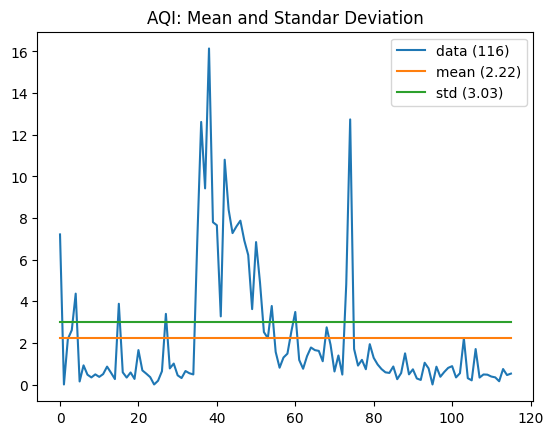


Histogram of AQI


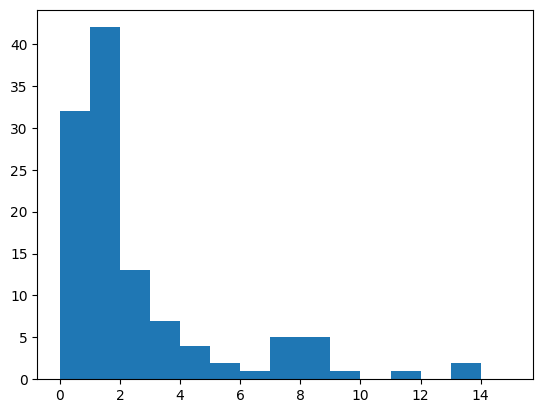


Observations:
All the measures are in the good AQI range for health.
Even though we put the sensors next to a kitchen while we were using it, almost all the measures are inside the 0-4 range.

This is the endpoint we are calling: 
https://www.airnowapi.org/aq/forecast/zipCode/?format=text/csv&zipCode=02143&date=2023-07-29&distance=25&API_KEY=8BB7CB2F-3314-44DE-A612-A8FF83ECF6D2

Airnowapi API raw data:
"DateIssue","DateForecast","ReportingArea","StateCode","Latitude","Longitude","ParameterName","AQI","CategoryNumber","CategoryName","ActionDay","Discussion"
"2023-07-28 ","2023-07-29 ","Boston","MA","42.351","-71.051","O3","70","2","Moderate","false",""
"2023-07-28 ","2023-07-29 ","Boston","MA","42.351","-71.051","PM2.5","-1","1","Good","false",""
"2023-07-28 ","2023-07-30 ","Boston","MA","42.351","-71.051","O3","-1","1","Good","false",""
"2023-07-28 ","2023-07-30 ","Boston","MA","42.351","-71.051","PM2.5","-1","1","Good","false",""
"2023-07-28 ","2023-07-31 ","Boston","MA","42.351","-7

In [54]:
# AQI Analysis
print("AQI - Air Quality Index Analysis:")
print("The EPA developed the AQI, which reports levels of ozone, particle pollution, and other common air pollutants on the same scale.")
print("An AQI reading of 101 corresponds to a level above the national air quality standard - the higher the AQI rating, the greater the health impact.")
print("To know more about the AQI you can go to: https://docs.airnowapi.org/aq101")
if verbose == 'verbose':
  print("For measuring the AQI we have follow the method used in this articule: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0137789")
  print("According to the paper they took two minute averages of measurements.")
  print("Since our measures are being taken every thirdy seconds, we are going to average each four mesures as one to measure AQI.")
  print("Then we are going to run an algorithm that will retrive us the PM in the air from the input we have from the sensors.")
  print("Once we have that information we will compare it with the information received by the AirNowAPI organization.")
  print()

# Average each four measures as one for AQI calculation
if verbose == 'very verbose':
  print("Raw input data after average every four observations:")
  print(pm_data_avg)
  print()

df = pd.DataFrame({
      'data ('+str(len(pm_data_avg))+')': pm_data_avg,
      'mean ('+str(pm_data_avg_mean)+')': [pm_data_avg_mean for i in range(len(pm_data_avg))],
      'std ('+str(pm_data_avg_std)+')': [pm_data_avg_std for i in range(len(pm_data_avg))]})

df.plot(title="Mean and Standar Deviation")
plt.show()
print()

# We take the AQI values from the new data:
pm_data_aqi = np.zeros(pm_data_avg.shape[0])
for i in range(pm_data_aqi.shape[0]):
  pm_data_aqi[i] = particle_count_to_pm(pm_data_avg[i])

if verbose == 'very verbose':
  print("Raw AQI data:")
  print(pm_data_aqi)
  print()

aqi_data_mean = round(np.mean(pm_data_aqi),2)
aqi_data_std = round(np.std(pm_data_aqi),2)
df = pd.DataFrame({
      'data ('+str(len(pm_data_aqi))+')': pm_data_aqi,
      'mean ('+str(aqi_data_mean)+')': [aqi_data_mean for i in range(len(pm_data_aqi))],
      'std ('+str(aqi_data_std)+')': [aqi_data_std for i in range(len(pm_data_aqi))]})

df.plot(title="AQI: Mean and Standar Deviation")
plt.show()
print()

if verbose == 'verbose':
  print("These are the measures for AQI categories given their effects in health: ")
  print("0-50: Good; 51-100: Moderate, 101-150: Unhealthy for Sensitive Groups, 151-200: Unhealthy, 201-300: Very Unhealthy, 301-500: Hazardous.")
  print("Considering this fact we will graph an histogram with this distributions.")
  print()

print("Histogram of AQI")
pm_data_aqi_rounded = np.around(pm_data_aqi)

plt.hist(pm_data_aqi_rounded, bins=range(int(min(pm_data_aqi_rounded)), int(max(pm_data_aqi_rounded))))
plt.show()
print()

if verbose == 'very verbose':
  print("Observations:")
  print("All the measures are in the good AQI range for health.")
  print("Even though we put the sensors next to a kitchen while we were using it, almost all the measures are inside the 0-4 range.")
  print()

# After get ours PMs AQI measures we will call airnowapi API to compare with outside region data
if verbose == 'verbose':
  print("Comparation with outside:")
  print("Now we will call airnowapi API to see what are the values for that region.")
  print("We are using the zipcode from the person that has the sensors in his home.")

API_KEY = '8BB7CB2F-3314-44DE-A612-A8FF83ECF6D2'
format = 'text/csv'
zipCode = '02143'
distance = '25'
today = date.today().strftime("%Y-%m-%d")
url = 'https://www.airnowapi.org/aq/forecast/zipCode/?format='+format+'&zipCode='+zipCode+'&date='+today+'&distance='+distance+'&API_KEY='+API_KEY
if verbose == 'very verbose':
  print("This is the endpoint we are calling: ")
  print(url)
  print()

r = requests.get(url)
zipCodeData = r.text
if verbose == 'very verbose':
  print("Airnowapi API raw data:")
  print(zipCodeData)

# Getting the PM2.5 from the API Response
pm2_dot_5_start = zipCodeData.find('PM2.5')+8
pm2_dot_5_end = zipCodeData[pm2_dot_5_start:].find(',') + pm2_dot_5_start -1
pm2_dot_5 = zipCodeData[pm2_dot_5_start:pm2_dot_5_end]
ratio_pm = round(np.mean(pm_data_aqi)/float(pm2_dot_5),2)
if verbose == 'verbose':
  print("The PM2.5 of this area is: " + pm2_dot_5)
  print("Taking the mean of our PM measures, the relation with the outside measure is: " + str(ratio_pm))

if verbose == 'verbose':
  if np.mean(pm_data_aqi) > float(pm2_dot_5):
    print("This means the air has PM inside the house which is dangerous and a bad sign.")
    print("We will trigger the air purifiers but in this case just open the windows will help as well.")
  else:
    print("This means the air inside the house is cleaner than outside.")
    print("Depending on the AQI value it is posible that we still have to trigger the air purifiers.")

## Dashboard

Here is the final result of the different analysis and investigations we made.

We are joining the more importante graphs in a dashboard and speaking outloud alerts to the user. The user can be warn in the case that is in risk or that he wants to turn the air purifiers on.

As dashboard we decided to create an idea of how it will look and experience using colab.
This is mainly because the course is not focus in web design, and we prefered to take all the advantage that we could have 
from colab and python using the techniques and resourse that we have seen in the classes.
Here is a simil of how the dashboard will look like:



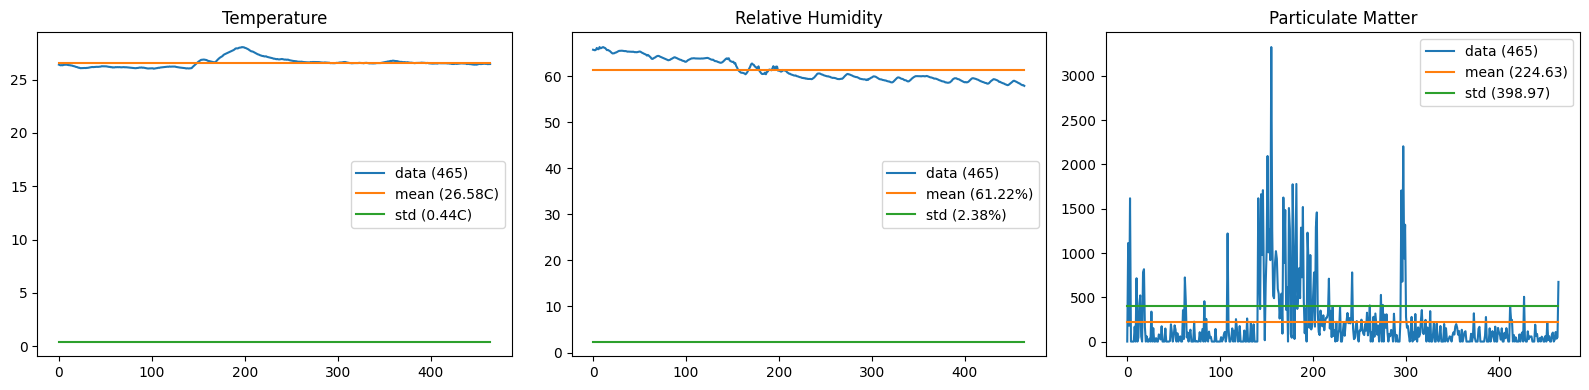

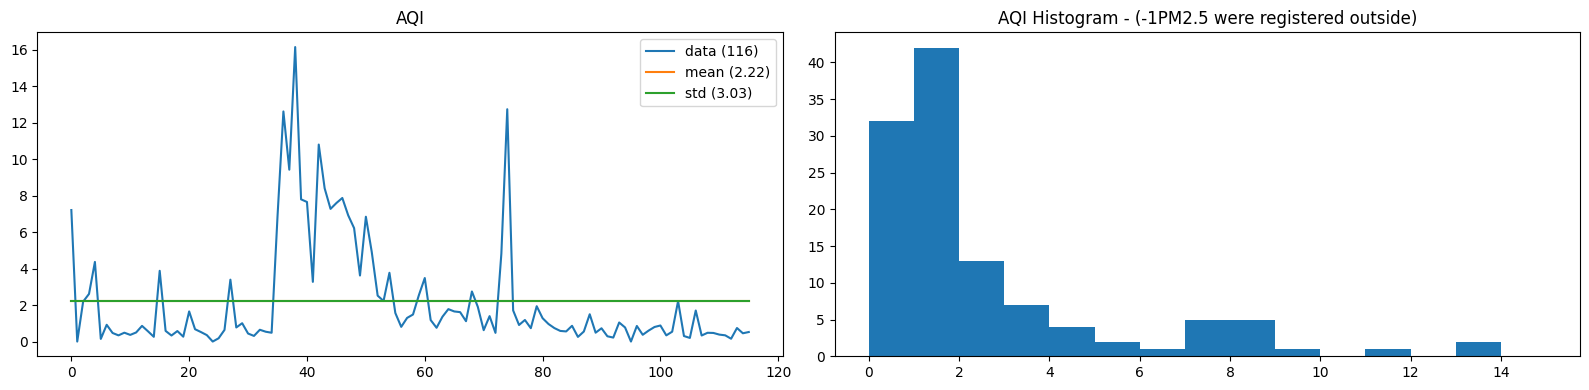

In [55]:
# Dashboard
print("As dashboard we decided to create an idea of how it will look and experience using colab.")
print("This is mainly because the course is not focus in web design, and we prefered to take all the advantage that we could have ")
print("from colab and python using the techniques and resourse that we have seen in the classes.")
print("Here is a simil of how the dashboard will look like:")
print()

# First layer: Templerature, Relative Humidity, PM
df1 = pd.DataFrame({
      'data ('+str(len(temp_data))+')': temp_data,
      'mean ('+str(temp_mean)+'C)': [temp_mean for i in range(len(temp_data))],
      'std ('+str(temp_std)+'C)': [temp_std for i in range(len(temp_data))]})

df2 = pd.DataFrame({
      'data ('+str(len(hum_data))+')': hum_data,
      'mean ('+str(hum_mean)+'%)': [hum_mean for i in range(len(hum_data))],
      'std ('+str(hum_std)+'%)': [hum_std for i in range(len(hum_data))]})

df3 = pd.DataFrame({
      'data ('+str(len(pm_data))+')': pm_data,
      'mean ('+str(pm_mean)+')': [pm_mean for i in range(len(pm_data))],
      'std ('+str(pm_std)+')': [pm_std for i in range(len(pm_data))]})

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))  # 1 row, 3 columns
df1.plot(title="Temperature", ax=ax1)
df2.plot(title="Relative Humidity", ax=ax2)
df3.plot(title="Particulate Matter", ax=ax3)
plt.tight_layout()

df4 = pd.DataFrame({
      'data ('+str(len(pm_data_aqi))+')': pm_data_aqi,
      'mean ('+str(aqi_data_mean)+')': [aqi_data_mean for i in range(len(pm_data_aqi))],
      'std ('+str(aqi_data_std)+')': [aqi_data_mean for i in range(len(pm_data_aqi))]})

fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(16,4))  # 1 row, 2 columns
df4.plot(title="AQI", ax=ax4)
plt.title("AQI Histogram - ("+pm2_dot_5+"PM2.5 were registered outside)")
plt.hist(pm_data_aqi_rounded, bins=range(int(min(pm_data_aqi_rounded)), int(max(pm_data_aqi_rounded))))
plt.tight_layout()

# Dashboard alarms
tts = gTTS("All measures are good")
sound_file = 'warnings.wav'
tts.save(sound_file)

hum_data[len(hum_data)-1] = 95 # uncomment for testing
message = ""
if hum_data[len(hum_data)-1] >= 95:
  message = "Warning!, relative humidity is above 95%. The dust sensor will not be able to work in this conditions."

temp_data[len(temp_data)-1] = 46 # uncomment for testing
if temp_data[len(temp_data)-1] >= 45:
  message = "Warning!, temperature is above 45 celsius degrees. The dust sensor will not be able to work in this conditions."

tmp_msg = ""
pm_data_aqi_mean = np.mean(pm_data_aqi)
pm_data_aqi_mean = 234 # uncomment for testing
if pm_data_aqi_mean > 100:
  message = message + "Warning!, particulate matters are too high."
  tmp_msg = "The air is unhealthy for sensitive groups."
  if pm_data_aqi_mean > 150:
    tmp_msg = "The air is unhealthy for everyone."
  if pm_data_aqi_mean > 200:
    tmp_msg = "The air is very unhealthy."
  if pm_data_aqi_mean > 300:
    tmp_msg = "The air is hazardous."
  message = message + tmp_msg

pm_data_aqi_mean = 234 # uncomment for testing
if pm_data_aqi_mean > 50 and pm_data_aqi_mean > float(pm2_dot_5):
  message = message + "Warning!, inside particulate matters are higher than outside. We recommend to open the windows"

if message != "":
  tts = gTTS(message)
  tts.save('warnings.wav')
Audio(sound_file, autoplay=True)